In [1]:
import pandas as pd
import numpy as np


In [2]:
data_df=pd.read_csv('brain-body-weights.csv')
data_df.head(3)

,body,brain,mammal
0,1.6,-2.0,Lesser short-tailed shrew
1,2.3,-1.4,Little brown bat
2,3.1,-1.2,Big brown bat


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

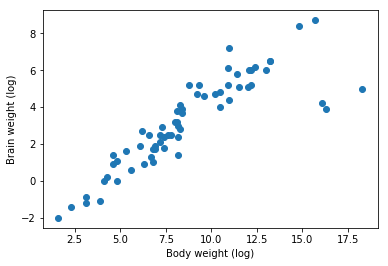

In [4]:
plt.scatter(data_df.body, data_df.brain)
plt.xlabel('Body weight (log)')
plt.ylabel('Brain weight (log)')
plt.show()

## Let's play with TensorFlow

In [5]:
import tensorflow as tf


In [6]:
# Slope and intercept parameters
a = tf.Variable(initial_value=0, dtype=tf.float32)
b = tf.Variable(initial_value=0, dtype=tf.float32)


In [7]:
# Create a placeholder for input/target data
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

In [8]:
# Compute predictions
y_hat = a*x + b

In [9]:
# Mean squared error (MSE)
loss = tf.reduce_mean( # Equivalent to np.mean()
    tf.square( # Equivalent to np.square()
        y - y_hat # Implements broadcasting like Numpy
    )
)

# Here we will use the Huber loss function
loss=tf.losses.huber_loss(y, y_hat, delta=1.0)

In [10]:
# Create the optimizer
gd = tf.train.GradientDescentOptimizer(
    learning_rate=0.1)

In [11]:
# Learning rate using placeholder
lr = tf.placeholder(dtype=tf.float32)

# Create the optimizer
gd = tf.train.GradientDescentOptimizer(
    learning_rate=lr)

In [12]:
# Create a training operation
train_op = gd.minimize(loss)

In [13]:
# Initialization operation
initialization_op = tf.global_variables_initializer()

with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Evaluate node "a"
    result = sess.run(a)
    print(result)
    # Prints: 0.0

0.0


In [14]:
with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Compute predictions
    result = sess.run(y_hat, feed_dict={
        x: data_df.body # Feed body weights
    })
    print(result)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Run the training operation, get loss value
    result = sess.run([train_op, loss], feed_dict={
        x: data_df.body, # Body weights
        y: data_df.brain, # Brain weights
        lr: 0.1 # Learning rate
    })
    print(result)
    # Prints: [None, 2.9202311]

[None, 2.920231]


In [16]:
# Monitor the a/b and loss values
loss_values = []
a_values = []
b_values = []

with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Run 100 times the training operation
    for _ in range(100):
        # Run training op and collect a/b and loss values
        _, loss_val, a_val, b_val = sess.run(
            [train_op, loss, a, b],
            feed_dict={
                x: data_df.body, # Body weight
                y: data_df.brain, # Brain weight
                lr: 0.1 # Learning rate
        })

        # Save values
        loss_values.append(loss_val)
        a_values.append(a_val)
        b_values.append(b_val)

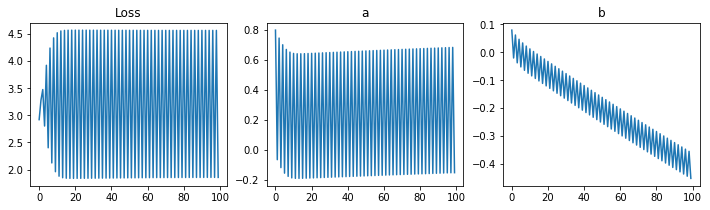

In [17]:
# Create figure with a subplot for each list of values
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, figsize=(12, 3))

# Plot loss values
ax1.set_title('Loss')
ax1.plot(loss_values)

# Plot slope values
ax2.set_title('a')
ax2.plot(a_values)

# Plot intercept values
ax3.set_title('b')
ax3.plot(b_values)

plt.show()

In [18]:
import numpy as np

# Compute mean and std of input variable
print('Mean:', np.mean(data_df.body)) # 8.64307692308
print('Std:', np.std(data_df.body)) # 3.5386207322

Mean: 8.643076923076922
Std: 3.538620732204927


In [19]:
# Standardized input x
x_standardized = (x - 8.643) / 3.539

# Redefine graph (code from above)
# ----------------
# Compute predictions
y_hat = a*x_standardized + b

# Huber loss
loss = tf.losses.huber_loss(y, y_hat)

# Learning rate placeholder
lr = tf.placeholder(dtype=tf.float32)

# Create the optimizer
gd = tf.train.GradientDescentOptimizer(learning_rate=lr)

# Create a training operation
train_op = gd.minimize(loss)

In [20]:
# Monitor the a/b and loss values
loss_values = []
a_values = []
b_values = []

with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Run 100 times the training operation
    for _ in range(120):
        # Run training op and collect a/b and loss values
        _, loss_val, a_val, b_val = sess.run(
            [train_op, loss, a, b],
            feed_dict={
                x: data_df.body, # Body weight
                y: data_df.brain, # Brain weight
                lr: 0.1 # Learning rate
        })

        # Save values
        loss_values.append(loss_val)
        a_values.append(a_val)
        b_values.append(b_val)

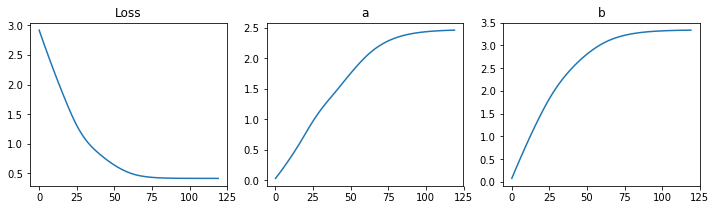

In [21]:
# Create figure with a subplot for each list of values
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, figsize=(12, 3))

# Plot loss values
ax1.set_title('Loss')
ax1.plot(loss_values)

# Plot slope values
ax2.set_title('a')
ax2.plot(a_values)

# Plot intercept values
ax3.set_title('b')
ax3.plot(b_values)

plt.show()

In [22]:
import numpy as np

# Create a hundred sample body weights
x_values = np.linspace(
    data_df.body.min(), # Between the minimum
    data_df.body.max(), # and maximum body weight values
    num=10
)

In [23]:
with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Compute predictions
    y_values = sess.run(y_hat, feed_dict={
        x: x_values, # Sample body weights
        a: a_values[-1], # last slope value
        b: b_values[-1] # last intercept value
    })

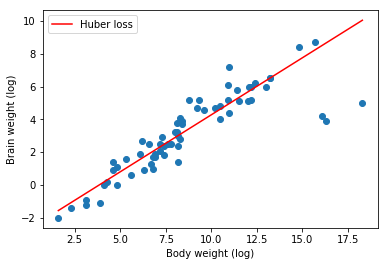

In [24]:
import seaborn as sns

# Get a few colors from default color palette
blue, green, red = sns.color_palette()[:3]

# Plot data with sample predictions
plt.scatter(data_df.body, data_df.brain, label=None)
plt.plot(x_values, y_values, label='Huber loss', color='r')
plt.xlabel('Body weight (log)')
plt.ylabel('Brain weight (log)')
plt.legend()
plt.show()